# Session 12: Sales from different stores
## Import data
Please check data description from the questions file on Brightspace.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# prompt: import sales data from /content/drive/MyDrive/Colab Notebooks/DSO528/Week6/Sales.csv

import pandas as pd
sales = pd.read_csv('/content/drive/MyDrive/Campus/Master Study/Courses/Fall 2024/DSO-528 Blended Data Business Analytics for Efficient Decisions/In-Class Practice/Session 12/Sales.csv')
print(sales.head())


   StoreID  Fashion  Leisure  Stretch  Original  SalesTotal
0        1      182     1528      496      2203        4409
1        2      129     2247      296      1890        4562
2        3      107     1652      267      2342        4368
3        4      117     1744      419      2119        4399
4        5      110     1736      755      1781        4382


## Silhouette analysis


**Key elements to prompt**
*   Standardize the data
*   Variables to use (all except StoreID and SalesTotal)
*   Range of n (number of clusters, 3 to 10 in this example)
*   Result to collect for each n. For example,
 *   Visuals such as biplot and silhouette plot
 *   Silouette score
 *   Seed for the best result
*   Generate overall silhouette plot.

*Note:*
*In this example, 100 seeds are set so that the best one can be reproduced. The only reason of doing so is for classroom illustration. In practice, you may let the algorithm choose the seed randomly.*


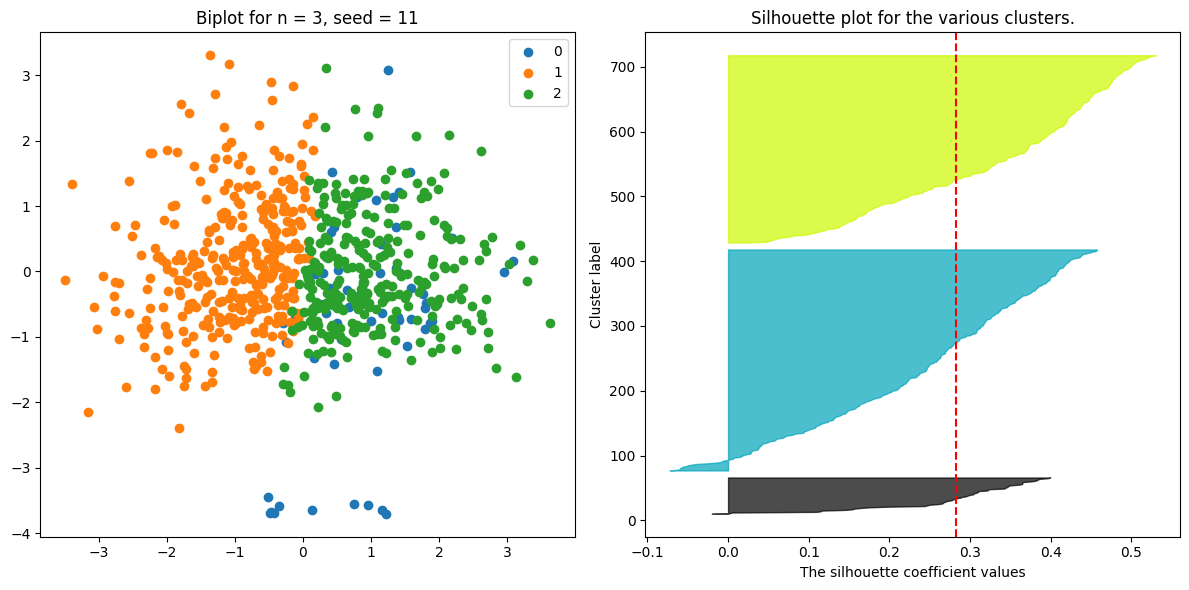

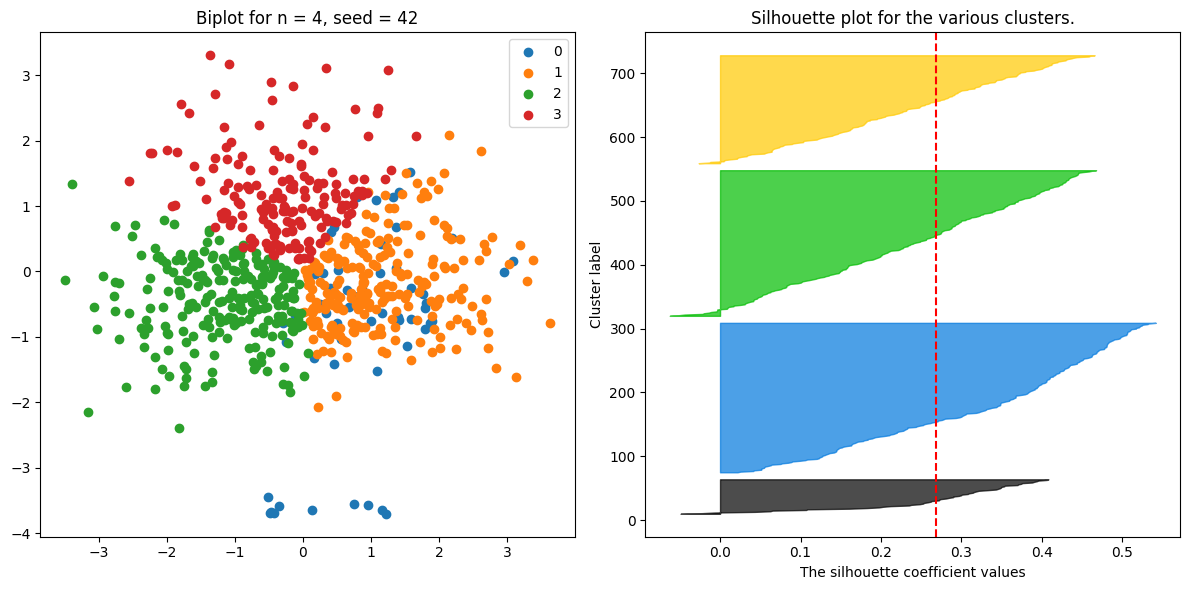

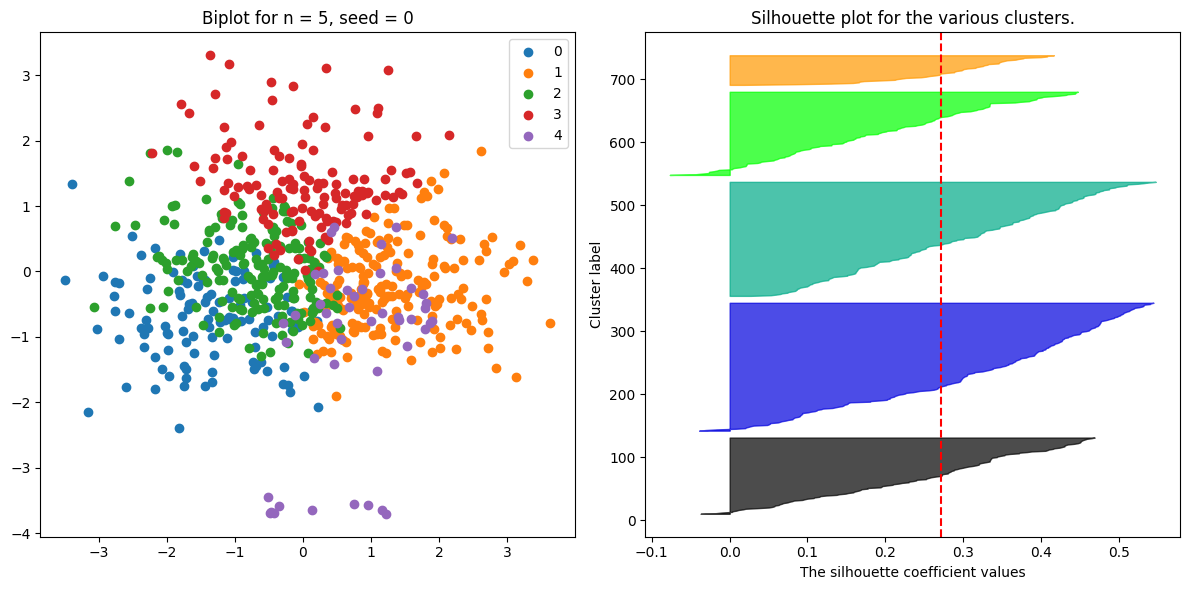

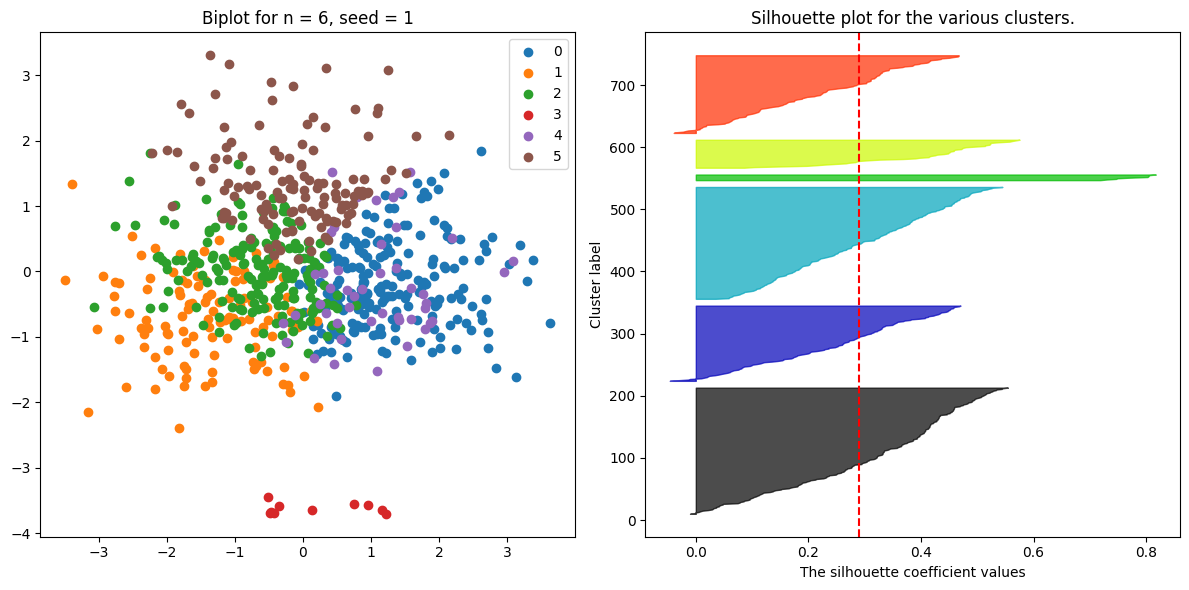

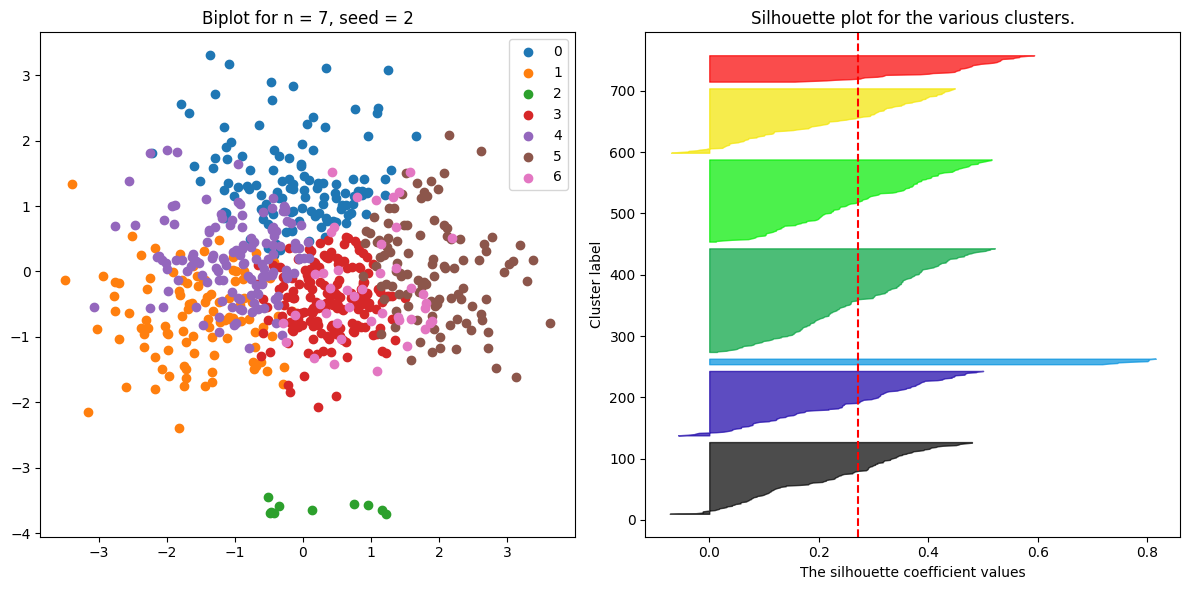

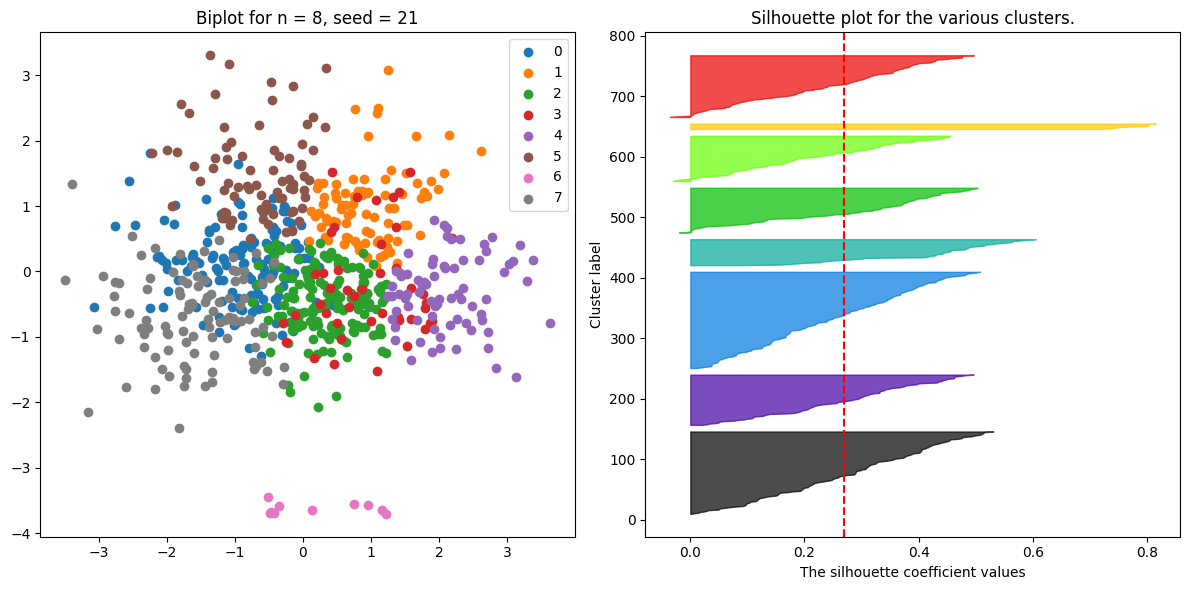

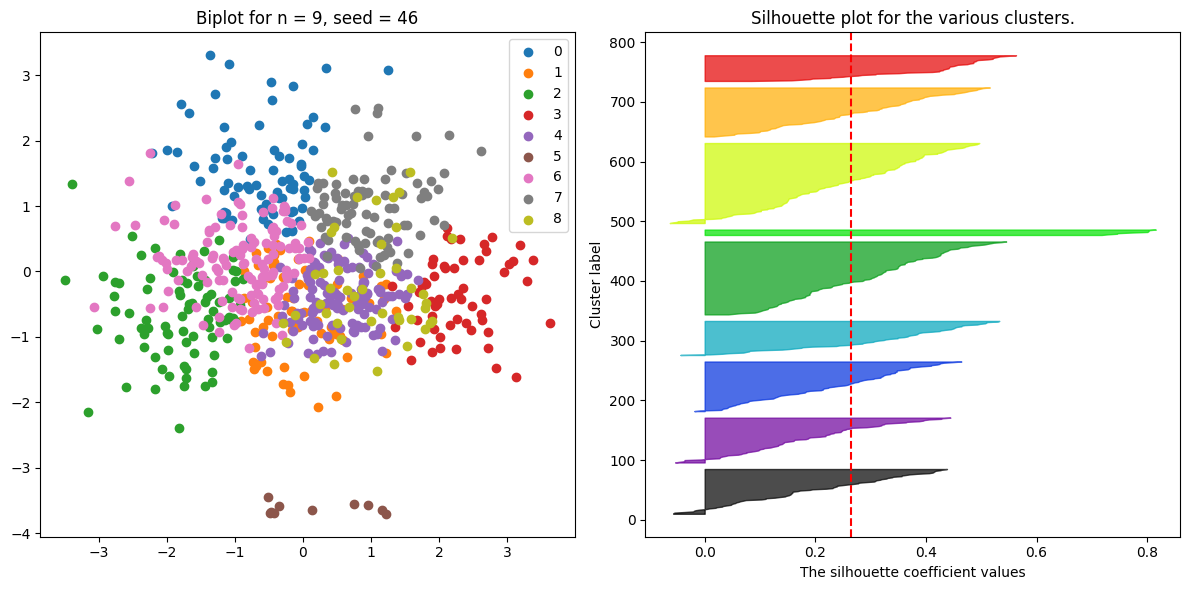

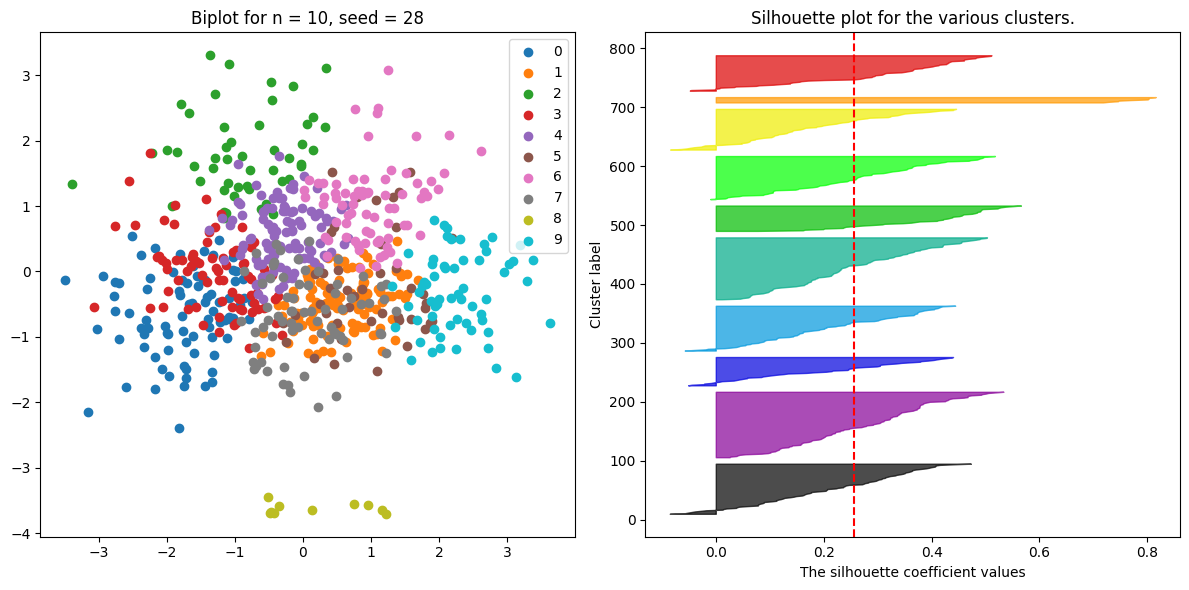

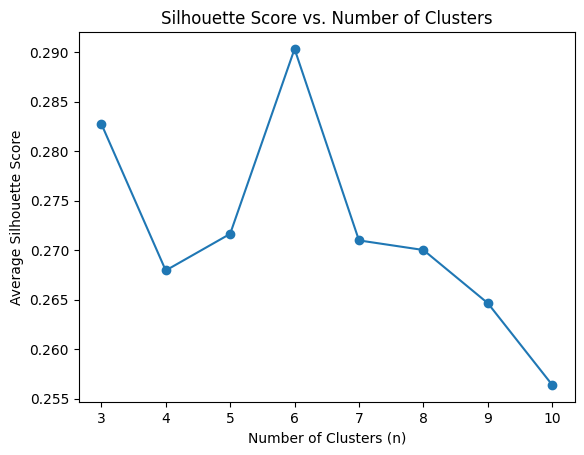

Best seed for each n: {3: 11, 4: 42, 5: 0, 6: 1, 7: 2, 8: 21, 9: 46, 10: 28}


In [4]:
# prompt: Use sales data, standardize and form clusters using all variables except StoreID and SalesTotal
# Kmeans,set n_init=100, make seed random,
# Set n from 3 to 10, perform silhouette analysis,
# For each n, (1) create a biplot using PCA, color clusters differently,
# (2) create a silhouette plot, put these as two subplots together,
# (3) report the seed for the best result
# Generate silhouette score plot

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.decomposition import PCA

# Standardize the data
sales_features = sales.drop(['StoreID', 'SalesTotal'], axis=1)
x = StandardScaler().fit_transform(sales_features)

# Silhouette analysis
range_n_clusters = range(3, 11)
silhouette_avg_scores = []
best_seed_for_n = {}

for n_clusters in range_n_clusters:
  silhouette_avg = -1
  best_seed = None

  for seed in range(100):  # Try different random seeds
    kmeans = KMeans(n_clusters=n_clusters, n_init=100, random_state=seed)
    # n_init sets the number of times to run the algorithm
    cluster_labels = kmeans.fit_predict(x)
    silhouette_avg_current = silhouette_score(x, cluster_labels)

    if silhouette_avg_current > silhouette_avg:
      silhouette_avg = silhouette_avg_current
      best_seed = seed

  best_seed_for_n[n_clusters] = best_seed
  silhouette_avg_scores.append(silhouette_avg)


  # Create biplot and silhouette plot together
  kmeans = KMeans(n_clusters=n_clusters, n_init=100, random_state=best_seed)
  cluster_labels = kmeans.fit_predict(x)
  pca = PCA(n_components=2)
  principalComponents = pca.fit_transform(x)
  principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
  principalDf['cluster'] = cluster_labels

  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  for i in range(n_clusters):
      plt.scatter(principalDf['principal component 1'][principalDf.cluster == i], principalDf['principal component 2'][principalDf.cluster == i], label = i)
  plt.title(f'Biplot for n = {n_clusters}, seed = {best_seed}')
  plt.legend()

  plt.subplot(1, 2, 2)
  sample_silhouette_values = silhouette_samples(x, cluster_labels)
  y_lower = 10
  for i in range(n_clusters):
      ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
      ith_cluster_silhouette_values.sort()
      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i
      color = cm.nipy_spectral(float(i) / n_clusters)
      plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
      y_lower = y_upper + 10  # 10 for the 0 samples

  plt.title("Silhouette plot for the various clusters.")
  plt.xlabel("The silhouette coefficient values")
  plt.ylabel("Cluster label")
  plt.axvline(x=silhouette_avg, color="red", linestyle="--")
  plt.tight_layout()
  plt.show()

# Generate silhouette score plot
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
plt.xlabel('Number of Clusters (n)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

print(f"Best seed for each n: {best_seed_for_n}")



## Generate the best solution based on Silhouette analysis
Based on the above Silhouette analysis, forming 6 clusters starting with seed 1 and n_init 100 generates the clustering with the best Sihouette score.



In [10]:
# prompt: Apply Kmeans to form 6 clusters using all variables except StoreID and SalesTotal,
# Set seed to 1,
# Save cluster label to the copy of sales data,
# Calculate cluster means for all variables except StoreID, report the cluster counts,
# calculate the silhouette score

sales_copy = sales.copy()

# Standardize the data
sales_features = sales.drop(['StoreID', 'SalesTotal'], axis=1)
x = StandardScaler().fit_transform(sales_features)

# Apply KMeans with n_clusters = 6 and seed = 1
kmeans = KMeans(n_clusters=6, n_init=100, random_state=1)
cluster_labels = kmeans.fit_predict(x)

# Save cluster labels to the copy of sales data
sales_copy['Cluster'] = cluster_labels

# Calculate cluster means for all variables except StoreID
cluster_means = sales_copy.groupby('Cluster').mean().drop('StoreID', axis=1)
print("Cluster Means:\n", cluster_means)

# Report cluster counts
cluster_counts = sales_copy.groupby('Cluster')['Cluster'].count()
print("\nCluster Counts:\n", cluster_counts)

# Calculate the silhouette score
silhouette_avg = silhouette_score(x, cluster_labels)
print("\nSilhouette Score:", silhouette_avg)


Cluster Means:
             Fashion      Leisure     Stretch     Original   SalesTotal
Cluster                                                               
0         83.078431  2296.112745  407.289216  1616.299020  4402.779412
1         82.459016  1615.180328  757.385246  1943.475410  4398.500000
2         84.508287  1795.066298  394.303867  2129.933702  4403.812155
3          4.200000   840.000000  315.800000  1039.600000  2199.600000
4         80.891304  1703.021739   26.347826  1585.108696  3395.369565
5        138.904762  1931.015873  434.261905  1893.396825  4397.579365

Cluster Counts:
 Cluster
0    204
1    122
2    181
3     10
4     46
5    126
Name: Cluster, dtype: int64

Silhouette Score: 0.2903382072181727


## Save the clusters with n=6 and n=7
We will move the result to Excel for further analysis.

In [6]:
# prompt: Use the sales data and kmeans to form clusters, set n=6 and seed as 1, and set n=7 and seed as 2, n_init=100
# Save cluster label for n=6 and n=7 to the copy of sales data, save altogehter as a csv file to /content/drive/MyDrive/Colab Notebooks/DSO528/Week6

sales_copy = sales.copy()

# Standardize the data
sales_features = sales.drop(['StoreID', 'SalesTotal'], axis=1)
x = StandardScaler().fit_transform(sales_features)

# Apply KMeans with n_clusters = 6 and seed = 1
kmeans_6 = KMeans(n_clusters=6, n_init=100, random_state=1)
cluster_labels_6 = kmeans_6.fit_predict(x)

# Save cluster labels to the copy of sales data
sales_copy['Cluster_n6'] = cluster_labels_6


# Apply KMeans with n_clusters = 7 and seed = 2
kmeans_7 = KMeans(n_clusters=7, n_init=100, random_state=2)
cluster_labels_7 = kmeans_7.fit_predict(x)

# Save cluster labels to the copy of sales data
sales_copy['Cluster_n7'] = cluster_labels_7

# Save the updated sales data to a CSV file
sales_copy.to_csv('/content/drive/MyDrive/Campus/Master Study/Courses/Fall 2024/DSO-528 Blended Data Business Analytics for Efficient Decisions/In-Class Practice/Session 12/sales_clusters.csv', index=False)


## (optional) Parallel coordinate plot
This will help visulize the common features and variability of data points in the same cluster, and help compare across different clusters.

In [12]:
sales_copy.head()

,StoreID,Fashion,Leisure,Stretch,Original,SalesTotal,Cluster
0,1,182,1528,496,2203,4409,5
1,2,129,2247,296,1890,4562,5
2,3,107,1652,267,2342,4368,2
3,4,117,1744,419,2119,4399,2
4,5,110,1736,755,1781,4382,1


<ipython-input-13-09a946aaaf5e>:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  parallel_coordinates(cluster_data.drop(['StoreID', 'Cluster'], axis=1), 'SalesTotal', color=plt.cm.get_cmap('tab10')(cluster_num))
<ipython-input-13-09a946aaaf5e>:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  parallel_coordinates(cluster_data.drop(['StoreID', 'Cluster'], axis=1), 'SalesTotal', color=plt.cm.get_cmap('tab10')(cluster_num))
<ipython-input-13-09a946aaaf5e>:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.

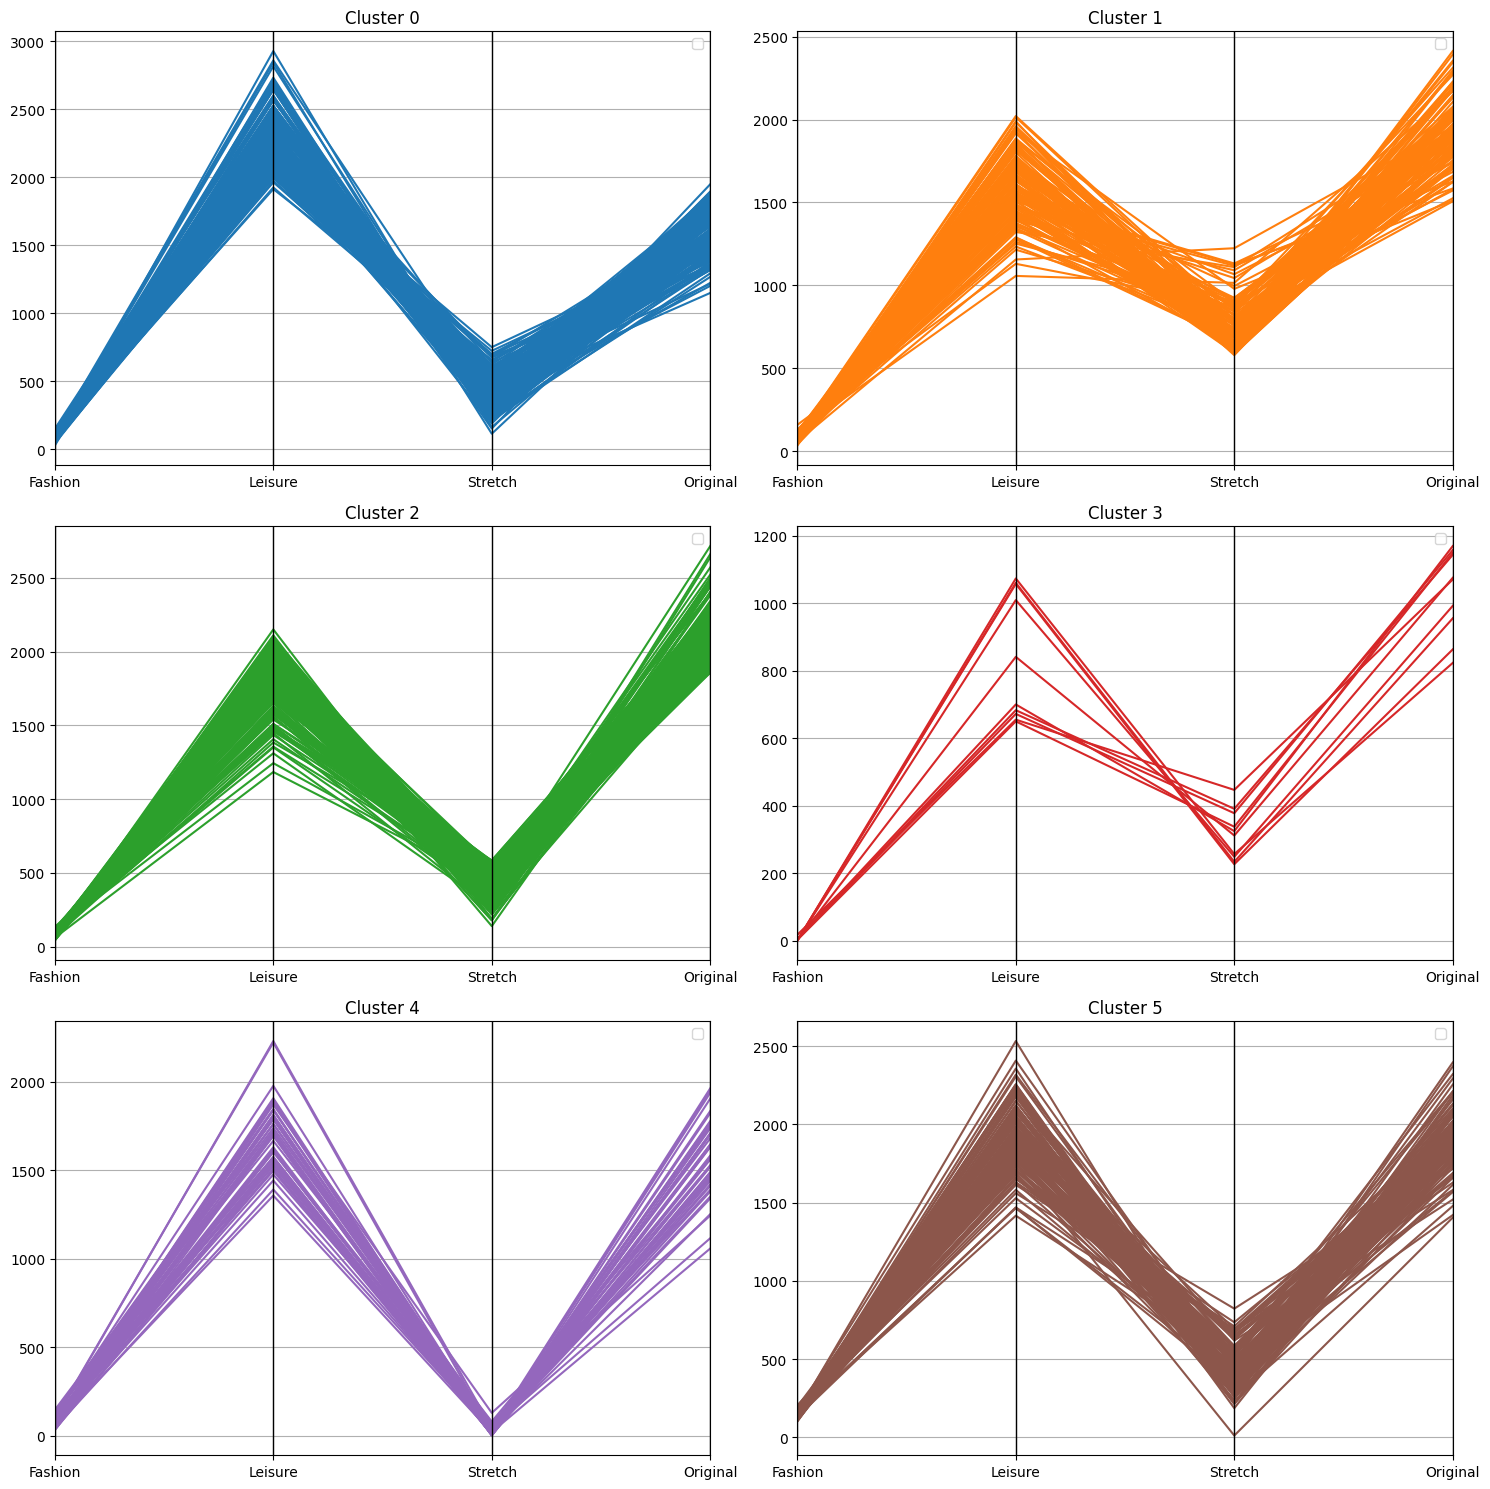

In [13]:
# prompt: generate 6 separate parallel coordinate plots,
# one for each cluster for the 6 clusters in the previous analysis,
# assign one color for a cluster, put 6 plots as 6 subplots together,
# remove the legends for all plots

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from pandas.plotting import parallel_coordinates

# Assuming 'sales_copy' and 'cluster_labels' are defined from the previous code

# Create a figure with 6 subplots for each cluster
plt.figure(figsize=(15, 15))

for cluster_num in range(6):
  plt.subplot(3, 2, cluster_num + 1)
  cluster_data = sales_copy[sales_copy['Cluster'] == cluster_num]
  parallel_coordinates(cluster_data.drop(['StoreID', 'Cluster'], axis=1), 'SalesTotal', color=plt.cm.get_cmap('tab10')(cluster_num))
  plt.title(f'Cluster {cluster_num}')
  plt.legend([]) # Remove legend

plt.tight_layout()
plt.show()

## (optional) Generate 3d biplot.

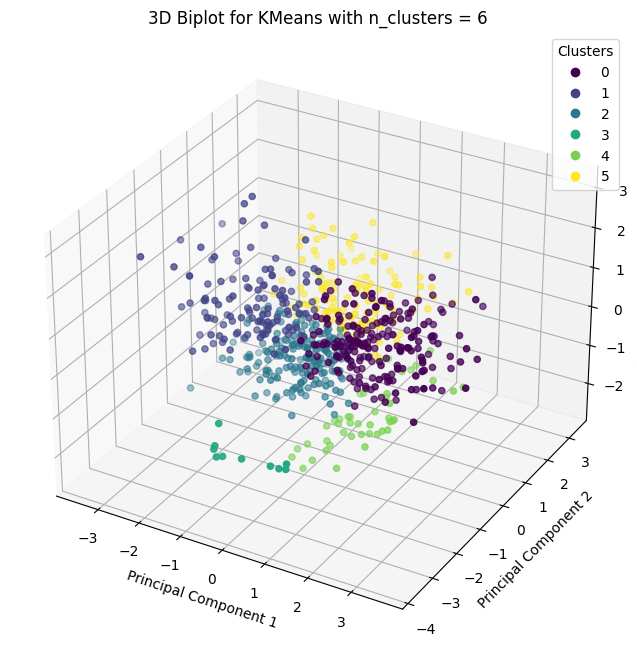

In [14]:
# prompt: create 3d biplot for the 6 clusters using PCA, color differently

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Perform PCA with 3 components
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2', 'PC3'])
principalDf['Cluster'] = cluster_labels_6

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with different colors for each cluster
scatter = ax.scatter(principalDf['PC1'], principalDf['PC2'], principalDf['PC3'], c=principalDf['Cluster'], cmap='viridis')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Biplot for KMeans with n_clusters = 6')

# Add a legend
plt.legend(*scatter.legend_elements(), title="Clusters")

plt.show()


## (optional) Generate interactive 3D biplot.

In [15]:
# prompt: create 3D biplot using PCA, color clusters differently, make the cube rotate

import pandas as pd
import plotly.express as px

# Perform PCA with 3 components
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2', 'PC3'])
principalDf['Cluster'] = cluster_labels_6

# Create a 3D scatter plot using Plotly
fig = px.scatter_3d(principalDf, x='PC1', y='PC2', z='PC3', color='Cluster',
                    title='3D Biplot for KMeans with n_clusters = 6')

# Enable rotation of the plot
fig.update_layout(
    scene=dict(
        xaxis_title='Principal Component 1',
        yaxis_title='Principal Component 2',
        zaxis_title='Principal Component 3'
    )
)

fig.show()


# Answers to Questions



1. Seeing the silhouette score, it is suggested to use total clusters = 2 since silhouette score with that number of cluster has higher score than total clusters = 10
2. Cluster 1 has the highest average total sales with total stores = 122 and with average total sales of 110,550
3. The cluster with the lowest average total sales = cluster 3; Total number of stores = 10; Average sales of Leisure = 840
4. The cluster that has the highest average profit per store is cluster 1 with average profit of 110.550. This cluster has higher average sales of Stretch workwear among other cluster
5. Cluster 3 totally has no datapoints moving to other clusters. In addition, the clusters that have more than 15% of their datapoints moving to other segments are cluster 0 and cluster 2





